In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from termcolor import colored
from warnings import filterwarnings
filterwarnings('ignore')

import nltk
#nltk.download()
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#nltk.download('wordnet')

import sklearn
from sklearn import model_selection, preprocessing, linear_model, metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import set_config
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train = pd.read_csv('/content/drive/MyDrive/train 2 (1).csv')
test = pd.read_csv('/content/drive/MyDrive/test 2.csv')

In [8]:
train.shape

(31962, 3)

In [9]:
test.shape

(17197, 2)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [12]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [13]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [15]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [16]:
test.isnull().sum()

id       0
tweet    0
dtype: int64

# Count number of words

In [17]:
def number_of_words(df):
    df['word_count'] = df['tweet'].apply(lambda x : len(str(x).split(" ")))
    print(df[['tweet','word_count']].head())


In [18]:
number_of_words(train)

                                               tweet  word_count
0   @user when a father is dysfunctional and is s...          21
1  @user @user thanks for #lyft credit i can't us...          22
2                                bihday your majesty           5
3  #model   i love u take with u all the time in ...          17
4             factsguide: society now    #motivation           8


In [19]:
number_of_words(test)

                                               tweet  word_count
0  #studiolife #aislife #requires #passion #dedic...          12
1   @user #white #supremacists want everyone to s...          20
2  safe ways to heal your #acne!!    #altwaystohe...          15
3  is the hp and the cursed child book up for res...          24
4    3rd #bihday to my amazing, hilarious #nephew...          18


In [20]:
def number_of_chars(train):
    train['char_count'] = train['tweet'].str.len() ## this also includes spaces
    print(train[['tweet','char_count']].head())

In [21]:
number_of_chars(train)

                                               tweet  char_count
0   @user when a father is dysfunctional and is s...         102
1  @user @user thanks for #lyft credit i can't us...         122
2                                bihday your majesty          21
3  #model   i love u take with u all the time in ...          86
4             factsguide: society now    #motivation          39


In [22]:
positive = 100*len(train.loc[train['label']==0,'label'])/len(train['label'])
negative = 100*len(train.loc[train['label']==1,'label'])/len(train['label'])
print(f'Percentage of Negative Sentiment tweets is {positive}')
print(f'Percentage of Postitive Sentiment tweets is {negative}')

Percentage of Negative Sentiment tweets is 92.98542018647143
Percentage of Postitive Sentiment tweets is 7.014579813528565


In [23]:
#Positive sentiments
train[train['label']==0].head(20) 

,id,label,tweet,word_count,char_count
0,1,0,@user when a father is dysfunctional and is s...,21,102
1,2,0,@user @user thanks for #lyft credit i can't us...,22,122
2,3,0,bihday your majesty,5,21
3,4,0,#model i love u take with u all the time in ...,17,86
4,5,0,factsguide: society now #motivation,8,39
5,6,0,[2/2] huge fan fare and big talking before the...,21,116
6,7,0,@user camping tomorrow @user @user @user @use...,12,74
7,8,0,the next school year is the year for exams.ð...,23,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,13,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,15,50


In [24]:
#Negative sentiments
neg = train[train['label']==1]

In [25]:
pos = train[train['label']==0]

In [26]:
train_len = train['tweet'].str.len()
test_len = test['tweet'].str.len()
print("train data length :" , train_len)
print("test data length :" , test_len)

train data length : 0        102
1        122
2         21
3         86
4         39
        ... 
31957     68
31958    131
31959     63
31960     67
31961     32
Name: tweet, Length: 31962, dtype: int64
test data length : 0         90
1        101
2         71
3        142
4         93
        ... 
17192    108
17193     96
17194    145
17195    104
17196     64
Name: tweet, Length: 17197, dtype: int64


### EDA

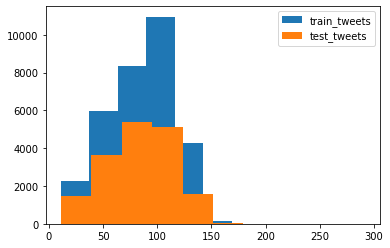

In [27]:
plt.hist(train_len, bins=10,label='train_tweets')
plt.hist(test_len , bins=10, label='test_tweets')
plt.legend()
plt.show()

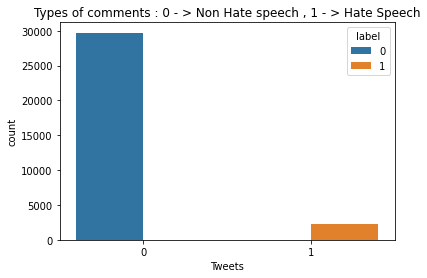

In [28]:
sns.countplot(data=train, x='label', hue='label')
plt.title('Types of comments : 0 - > Non Hate speech , 1 - > Hate Speech')
plt.xlabel('Tweets')
plt.show()

In [29]:
labels = {0: "non hate speech", 1: "hate speech"}
print(labels)

{0: 'non hate speech', 1: 'hate speech'}


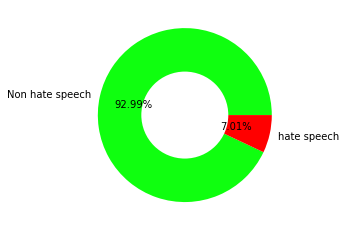

In [30]:
# Creates pie chart
plt.pie(
    train["label"].value_counts(),
    autopct = "%.2f%%",
    labels = ["Non hate speech", "hate speech"],
    colors = ["#0fff0f", "#ff0000"]
)

# Creates circle
circle = plt.Circle((0,0), 0.50,fc='white')

# Adds circle object to the existing figure (pie chart)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.show()

## Analyzing the average length of a tweet

[Text(0.5, 0, '( Number of Tokens )'),
 Text(0, 0.5, '( Number of Observations )')]

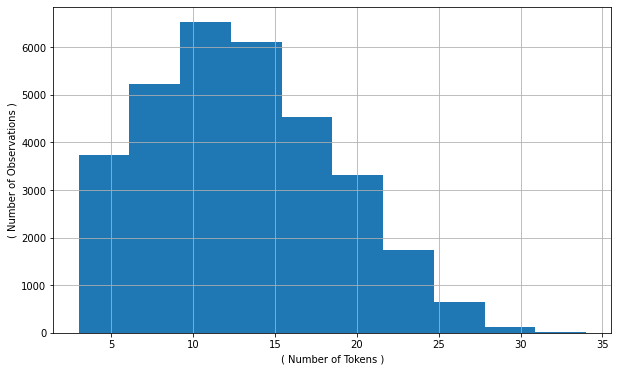

In [31]:
ax1 = train.tweet.str.split().map(lambda x: len(x)).hist(figsize=(10, 6))
ax1.set(xlabel="( Number of Tokens )", ylabel="( Number of Observations )")

### Most of the tweets have around 5 to 20 tokens.

Text(0, 0.5, '( Number of Tokens )')

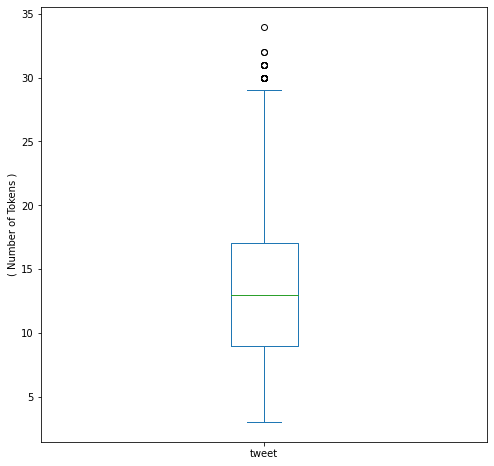

In [32]:
ax2 = train.tweet.str.split().map(lambda x: len(x)).plot.box(figsize=(8,8))
ax2.set_ylabel("( Number of Tokens )")

### The number of tokens between 25th and 75th %ile (Interquartile range) of data ranges from 9 to 17 tokens, median being 13 tokens.
Max length of any tweet in the dataset is less than 35 tokens.

# Twitter hashtag analysis

In [33]:
def get_hash_tags(df_series):
    """ Collects all hash tags from a given pandas series.
    
    Args:
        df_series (pd.Series): Pandas series object containing text data.
    
    Returns:
        hash_tags (list): List of hash tags from the pandas series.
    """
    
    hash_tags = []
    for text in df_series:
        hash_tags.extend(re.findall(r'#(\w+)', text))
        
    return hash_tags

In [34]:
non_offensive_hashtags = get_hash_tags(train[train["label"]==0]["tweet"])
offensive_hashtags = get_hash_tags(train[train["label"]==1]["tweet"])

In [35]:
from collections import Counter
non_offensive_hashtag_counts = Counter(non_offensive_hashtags)
offensive_hashtag_counts = Counter(offensive_hashtags)

In [36]:
non_offensive_hashtag_counts_df = pd.DataFrame.from_dict(non_offensive_hashtag_counts, orient="index").reset_index()
non_offensive_hashtag_counts_df.columns = ["hashtag", "count"]
non_offensive_hashtag_counts_df.sort_values("count", ascending=False, inplace=True)
display(non_offensive_hashtag_counts_df.head())

offensive_hashtag_counts_df = pd.DataFrame.from_dict(offensive_hashtag_counts, orient="index").reset_index()
offensive_hashtag_counts_df.columns = ["hashtag", "count"]
offensive_hashtag_counts_df.sort_values("count", ascending=False, inplace=True)
display(offensive_hashtag_counts_df.head())

,hashtag,count
33,love,1531
41,positive,874
163,healthy,570
212,smile,548
40,thankful,491


,hashtag,count
22,trump,133
31,politics,94
67,allahsoil,92
28,libtard,76
30,liberal,75


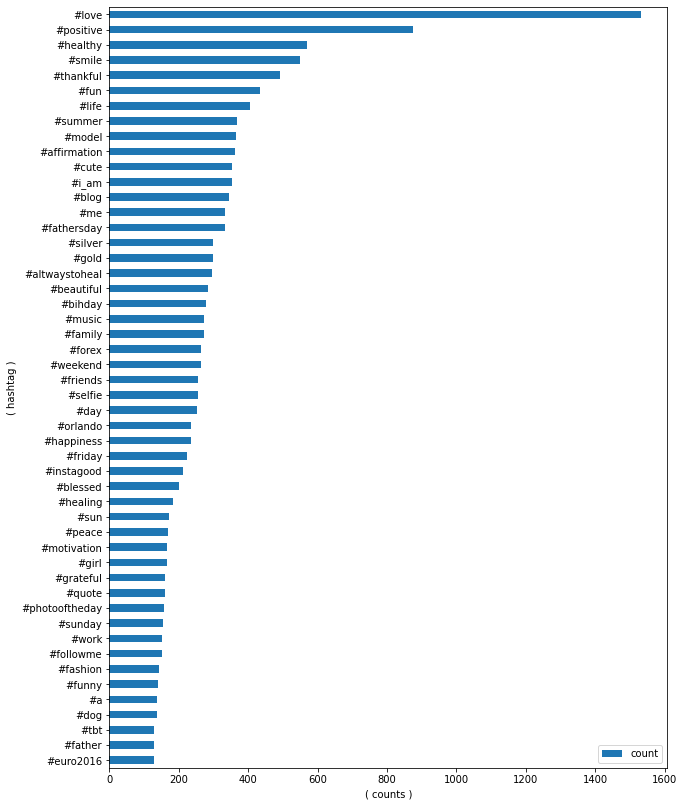

In [37]:
ax1 = non_offensive_hashtag_counts_df.head(50).plot.barh(y="count", figsize=(10, 14))
ax1.set(xlabel="( counts )", ylabel="( hashtag )")
ax1.set_yticklabels(non_offensive_hashtag_counts_df.head(50).agg({"hashtag": lambda x: '#'+x}).values.flatten())
ax1.invert_yaxis()
plt.show()

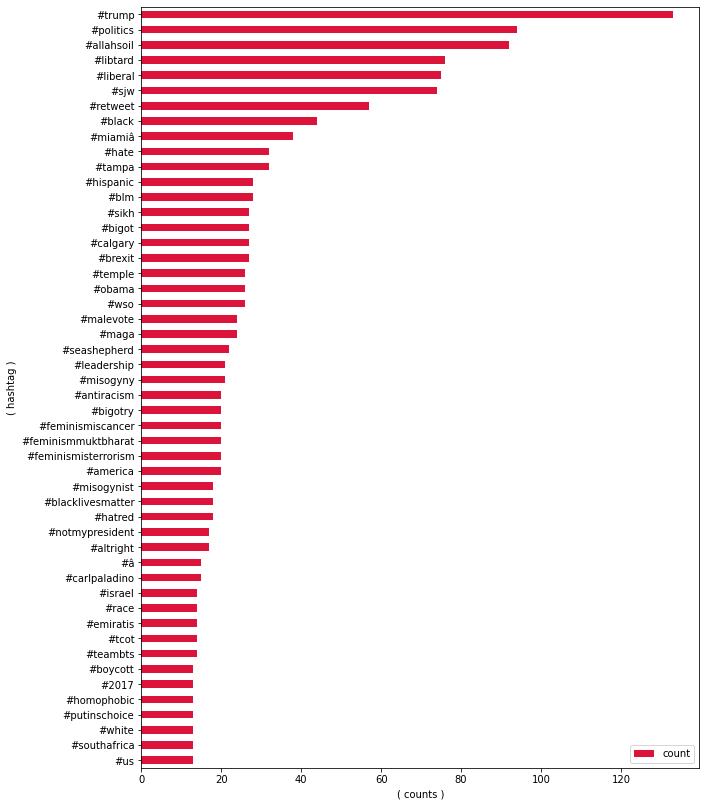

In [38]:
ax2 = offensive_hashtag_counts_df.head(50).plot.barh(y="count", figsize=(10, 14), color="crimson")
ax2.set(xlabel="( counts )", ylabel="( hashtag )")
ax2.set_yticklabels(offensive_hashtag_counts_df.head(50).agg({"hashtag": lambda x: '#'+x}).values.flatten())
ax2.invert_yaxis()
plt.show()

In [39]:
def count_rows_with_hashtag(df_series):
    """ Counts the number of rows containing at least one hashtag (#example).
    
    Args:
        df_series (pd.Series): Pandas series containing text data.
        
    Returns:
        count (int): Count of number of rows containing at least one hashtag.
    """
    
    count = 0
    for tweet in df_series:
        if re.search(r'#(\w+)', tweet):
            count+=1
    
    return count

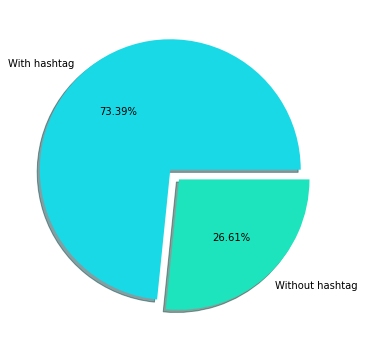

In [40]:
hashtag_tweet_count = count_rows_with_hashtag(train["tweet"])

train_rows, train_cols = train.shape

plt.figure(figsize=(6, 6))

# Creates pie chart
plt.pie(
    [hashtag_tweet_count, train_rows-hashtag_tweet_count],
    autopct = "%.2f%%",
    labels = ["With hashtag", "Without hashtag"],
    explode = [0, 0.10],
    shadow = True,
    colors = ["#1Ad9E6", "#1DE4BD"]
)

plt.show()

In [41]:
c=CountVectorizer(stop_words='english')
word=c.fit_transform(train.tweet)
summation=word.sum(axis=0)
print(summation)

[[ 51  28   2 ... 272   1   2]]


In [42]:
freq=[(word,summation[0,i]) for word,i in c.vocabulary_.items()]
freq=sorted(freq,key=lambda x:x[1],reverse=True)
frequency = pd.DataFrame(freq, columns=['word', 'freq'])
print(frequency)

           word   freq
0          user  17577
1          love   2749
2           day   2311
3           amp   1776
4         happy   1686
...         ...    ...
41099       isz      1
41100  airwaves      1
41101    mantle      1
41102   shirley      1
41103   chisolm      1

[41104 rows x 2 columns]


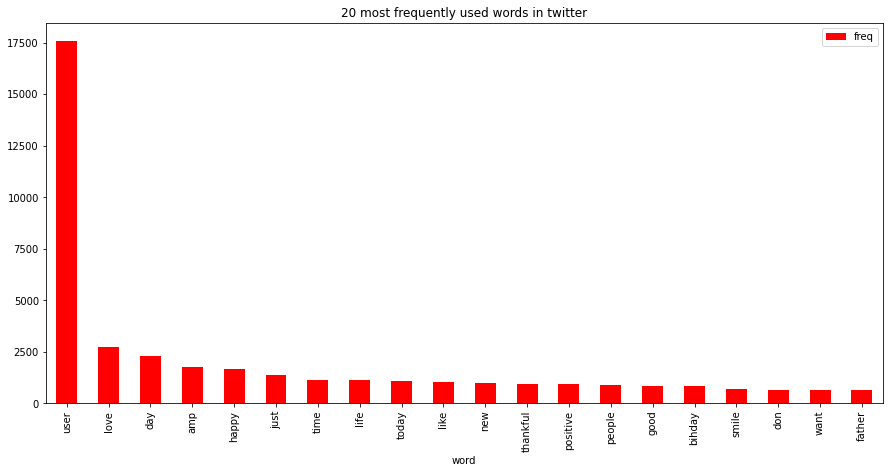

In [43]:
frequency.head(20).plot(x='word', y='freq', kind='bar',figsize=(15, 7), color = 'red')
plt.title("20 most frequently used words in twitter")
plt.show()

In [44]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
from wordcloud import WordCloud

In [46]:
sen = train['tweet'].tolist()

In [47]:
len(sen)

31962

In [48]:
sentences_as_single_string = " ".join(sen)

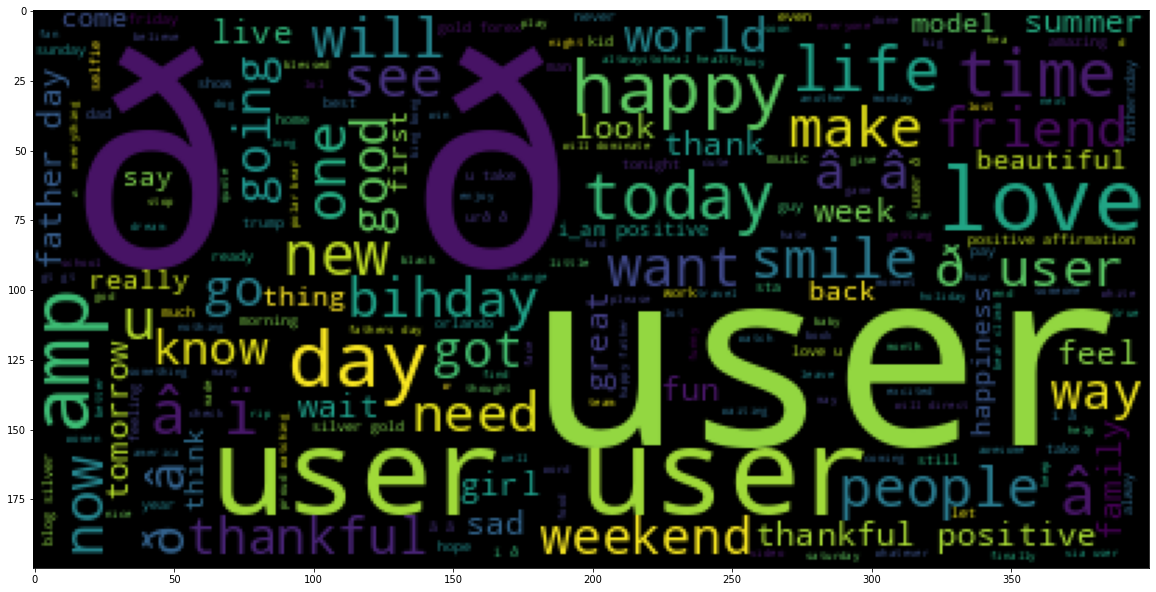

In [49]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_single_string))

In [50]:
#word cloud for negative sentiments
negative_sentences = neg['tweet'].tolist()
negative_string = " ".join(negative_sentences)

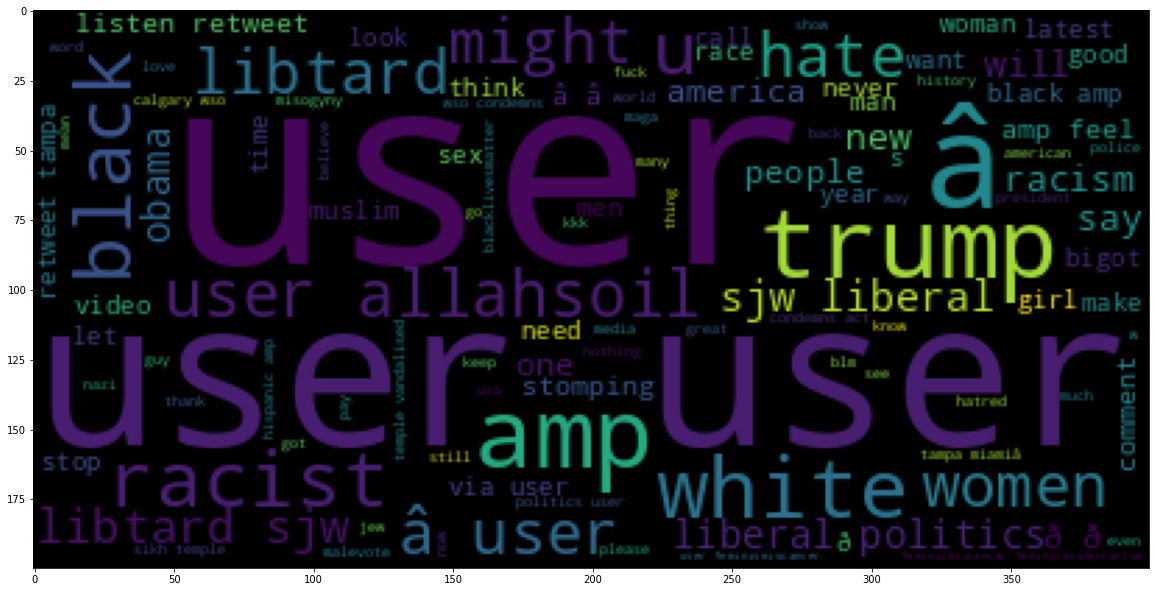

In [51]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_string))

In [52]:
#word cloud for positive sentiments
positive_sentences = pos['tweet'].tolist()
positive_string = " ".join(positive_sentences)

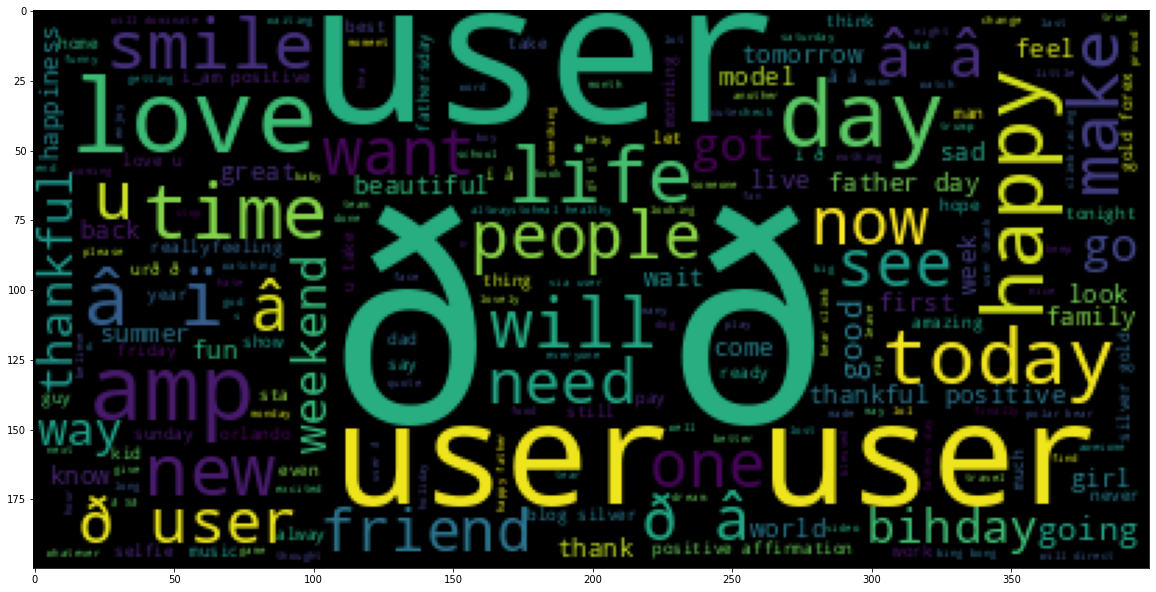

In [53]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_string))

### Data cleaning (Remove punctuations and stopwords from text)

In [54]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
import nltk #Natural language toolkit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
pipe_punc_removed_cleaned = [char for char in sentences_as_single_string if char not in string.punctuation]
pipe_punc_removed_cleaned = ''.join(pipe_punc_removed_cleaned)
pipe_punc_removed_cleaned = [word for word in pipe_punc_removed_cleaned.split() if word.lower() not in stopwords.words('english')]
pipe_punc_removed_cleaned

['user',
 'father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run',
 'user',
 'user',
 'thanks',
 'lyft',
 'credit',
 'cant',
 'use',
 'cause',
 'dont',
 'offer',
 'wheelchair',
 'vans',
 'pdx',
 'disapointed',
 'getthanked',
 'bihday',
 'majesty',
 'model',
 'love',
 'u',
 'take',
 'u',
 'time',
 'urð\x9f\x93±',
 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91',
 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦',
 'factsguide',
 'society',
 'motivation',
 '22',
 'huge',
 'fan',
 'fare',
 'big',
 'talking',
 'leave',
 'chaos',
 'pay',
 'disputes',
 'get',
 'allshowandnogo',
 'user',
 'camping',
 'tomorrow',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'dannyâ\x80¦',
 'next',
 'school',
 'year',
 'year',
 'examsð\x9f\x98¯',
 'cant',
 'think',
 'ð\x9f\x98\xad',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'love',
 'land',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'â\x80¦',
 'user',
 'user

### Count Vectorization (Tokenization)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sen)

In [60]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Pipeline

In [61]:
def text_cleaning(text):
    remv_punc = [char for char in text.lower() if char not in string.punctuation]
    remv_punc_join = ''.join(remv_punc)
    remv_punc_clean = [word for word in remv_punc_join.split() if word.lower() not in stopwords.words('english')]
    return remv_punc_clean

In [62]:
tweets_df_clean = train['tweet'].apply(text_cleaning)
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [63]:
train['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [64]:
vectorizer_analyzer = CountVectorizer(analyzer = text_cleaning)
countvectorizer_tweets = CountVectorizer(analyzer= text_cleaning, dtype= 'uint8').fit_transform(train['tweet']).toarray()

In [65]:
countvectorizer_tweets.shape

(31962, 47385)

In [66]:
X_features = countvectorizer_tweets
y_label = train['label']

### Training the naives bayes classifier model

In [67]:
X_features.shape

(31962, 47385)

In [68]:
y_label.shape

(31962,)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.3, random_state = 1)

In [70]:
from sklearn.naive_bayes import MultinomialNB
NaiveBclassifier = MultinomialNB()
NaiveBclassifier.fit(X_train,y_train)

MultinomialNB()

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
# Predicting test cases
y_pred_test = NaiveBclassifier.predict(X_test)


<AxesSubplot:>

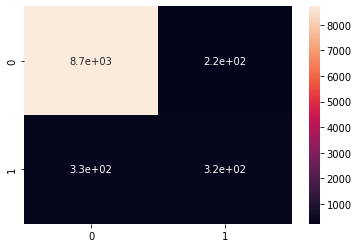

In [73]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot= True)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy = accuracy_score(y_test, y_pred_test)

In [76]:
print("Accuracy:", accuracy)

Accuracy: 0.9426426113254771


### SVM

In [77]:
x = train.tweet
y = train.label

print(len(x), len(y))

31962 31962


In [78]:
# dividing the test and train data in 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

23971 23971
7991 7991


In [79]:
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [80]:
#transforming the training and test data into document term matrices
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [81]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

In [82]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)
#predicting output for test data
y_pred = model.predict(x_test_dtm)

In [83]:
accuracy_score(y_test,y_pred)

0.9582029783506445

In [84]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7316,  116],
       [ 218,  341]])

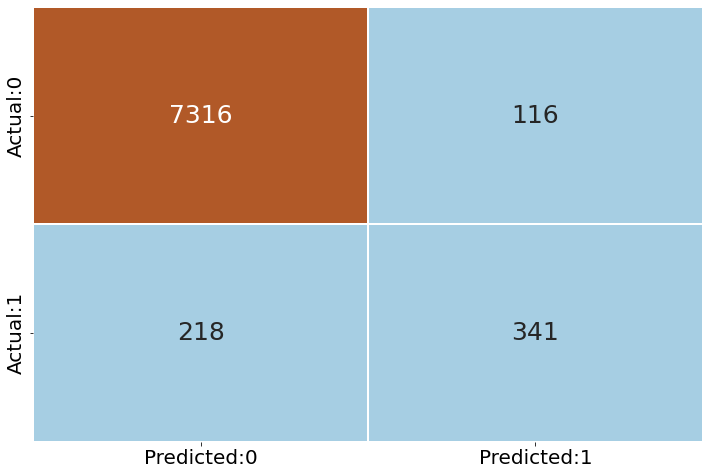

In [85]:
plt.rcParams['figure.figsize'] = [12,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7432
           1       0.75      0.61      0.67       559

    accuracy                           0.96      7991
   macro avg       0.86      0.80      0.82      7991
weighted avg       0.96      0.96      0.96      7991



### Logistic, decision tree,KNN

In [87]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [89]:
x = train.tweet
y = train.label
print(len(x), len(y))

31962 31962


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [91]:
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN'}
cv_models=[logreg_cv,dt_cv,knn_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model,X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9619860100383534
Decision Tree Test Accuracy: 0.9524748444157011
KNN Test Accuracy: 0.9413366156397405


# Evaluating the Logistics, KNN, Decison tree

In [92]:
def model_Evaluate(model):
    acc_train=model.score(X_train, y_train)
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Accuracy of model on training data : 98.68591605953605
Accuracy of model on testing data : 95.90155386380226 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8940
           1       0.83      0.50      0.62       649

    accuracy                           0.96      9589
   macro avg       0.90      0.74      0.80      9589
weighted avg       0.96      0.96      0.95      9589



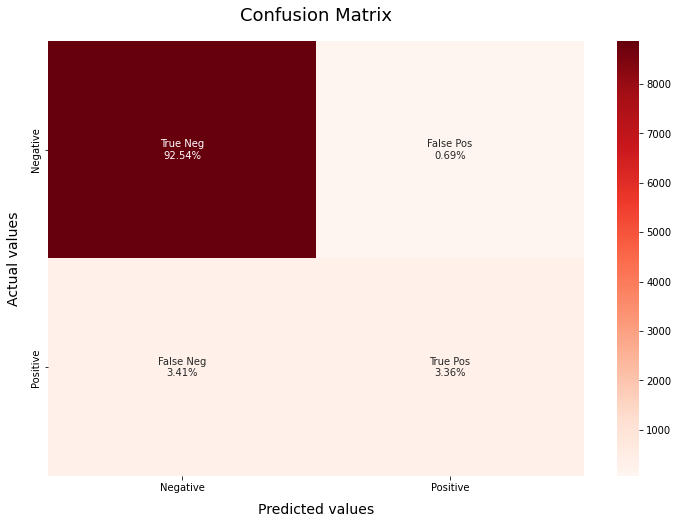

In [93]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

Accuracy of model on training data : 100.0
Accuracy of model on testing data : 94.7752633225571 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8940
           1       0.64      0.53      0.58       649

    accuracy                           0.95      9589
   macro avg       0.80      0.76      0.78      9589
weighted avg       0.94      0.95      0.95      9589



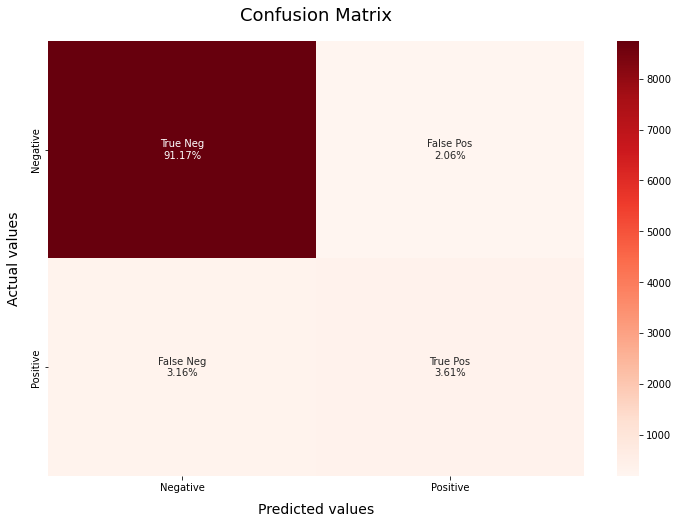

In [94]:
dtc = DecisionTreeClassifier()
history=dtc.fit(X_train, y_train)
model_Evaluate(dtc)

Accuracy of model on training data : 94.52911992133374
Accuracy of model on testing data : 94.17040358744396 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8940
           1       0.93      0.15      0.26       649

    accuracy                           0.94      9589
   macro avg       0.94      0.57      0.61      9589
weighted avg       0.94      0.94      0.92      9589



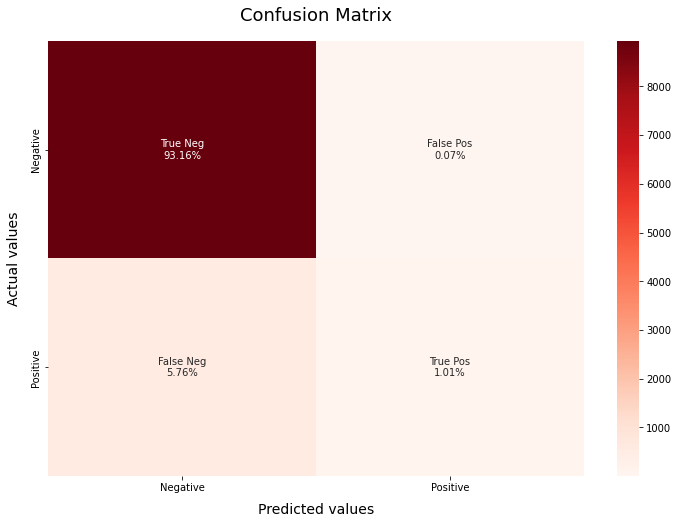

In [95]:
kn = KNeighborsClassifier()
history=kn.fit(X_train, y_train)
model_Evaluate(kn)

# XGBOOST

In [96]:
# dividing the test and train data in 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

23971 23971
7991 7991


In [97]:
tfidf_vect = TfidfVectorizer() #tfidfVectorizer
Xtrain_tfidf = tfidf_vect.fit_transform(x_train)
Xtest_tfidf = tfidf_vect.transform(x_test)

XGBoost Accuracy : 95.37%


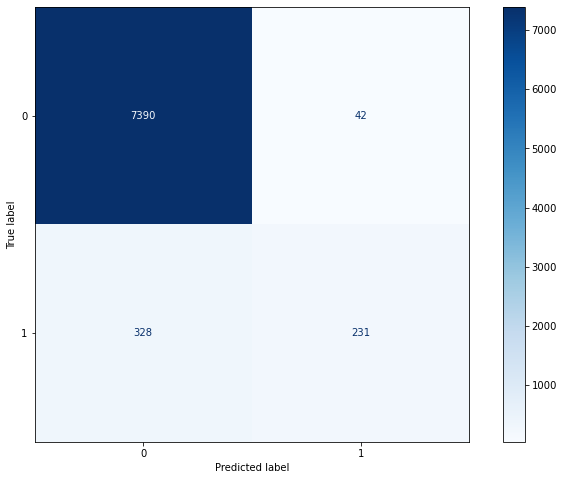

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from xgboost.sklearn import XGBClassifier
xgbo = XGBClassifier()
xgbo.fit(Xtrain_tfidf,y_train)
y_pred=xgbo.predict(Xtest_tfidf)
s4=accuracy_score(y_test,y_pred)
print("XGBoost Accuracy :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(xgbo, Xtest_tfidf, y_test, cmap = 'Blues')
plt.grid(False)

# LSTM

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import string
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [141]:
X = train.tweet
Y = train.label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [142]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [143]:
from keras import utils
max_words = 1000
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = utils.pad_sequences(sequences,maxlen=max_len)

In [149]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [150]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(None, 1))) # input_shape should match the shape of your input data
model.add(Dense(units=1, activation='sigmoid')) # binary classification problem, so output has 1 unit with sigmoid activation
model.summary()

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [153]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 200)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 200, 50)           50000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [154]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
170/170 [==============================] - 77s 437ms/step - loss: 0.2220 - accuracy: 0.9299 - val_loss: 0.1544 - val_accuracy: 0.9435
Epoch 2/10
170/170 [==============================] - 88s 520ms/step - loss: 0.1479 - accuracy: 0.9468 - val_loss: 0.1438 - val_accuracy: 0.9494


In [156]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = utils.pad_sequences(test_sequences,maxlen=max_len)

In [157]:
accr = model.evaluate(test_sequences_matrix,Y_test)

150/150 [==============================] - 5s 35ms/step - loss: 0.1591 - accuracy: 0.9466


In [158]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.159
  Accuracy: 0.947


# CNN

In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [161]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(X_train)
sequence_train=tokenizer.texts_to_sequences(X_train)
sequence_test=tokenizer.texts_to_sequences(X_test)

In [162]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(X_train)
sequence_train=tokenizer.texts_to_sequences(X_train)
sequence_test=tokenizer.texts_to_sequences(X_test)

In [163]:
data_train=pad_sequences(sequence_train)
data_train.shape

(27167, 39)

In [164]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(4795, 39)

In [165]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [166]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 39)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 39, 20)            827780    
                                                                 
 conv1d (Conv1D)             (None, 37, 32)            1952      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 64)            0         
 1D)                                                       

In [167]:
#Training the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,Y_train,validation_data=(data_test,Y_test),epochs=5,batch_size=100)

Epoch 1/5
272/272 [==============================] - 10s 30ms/step - loss: 0.3184 - accuracy: 0.9258 - val_loss: 0.2033 - val_accuracy: 0.9331
Epoch 2/5
272/272 [==============================] - 7s 26ms/step - loss: 0.1580 - accuracy: 0.9452 - val_loss: 0.1543 - val_accuracy: 0.9508
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0946 - accuracy: 0.9692 - val_loss: 0.1652 - val_accuracy: 0.9516
Epoch 4/5
272/272 [==============================] - 5s 19ms/step - loss: 0.0640 - accuracy: 0.9798 - val_loss: 0.1886 - val_accuracy: 0.9510
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.0441 - accuracy: 0.9874 - val_loss: 0.2285 - val_accuracy: 0.9558


In [168]:
y_pred=model.predict(data_test)
y_pred

150/150 [==============================] - 1s 3ms/step


array([[9.9860346e-01, 1.3911425e-03, 8.1820508e-07, 2.9079631e-06,
        1.7051037e-06],
       [9.9984670e-01, 1.5294712e-04, 5.2671048e-08, 3.1821892e-07,
        1.7076346e-07],
       [9.9991602e-01, 8.3971216e-05, 1.8945248e-10, 8.9972679e-10,
        3.7733222e-10],
       ...,
       [9.0278363e-01, 9.7215258e-02, 3.8818271e-07, 3.7965148e-07,
        2.0301520e-07],
       [9.9999440e-01, 5.6493132e-06, 3.7212267e-10, 4.4624855e-09,
        2.0193647e-09],
       [1.0000000e+00, 4.4935188e-11, 5.9560019e-18, 7.7019451e-16,
        2.1688231e-16]], dtype=float32)

Text(33.0, 0.5, 'y_pred')

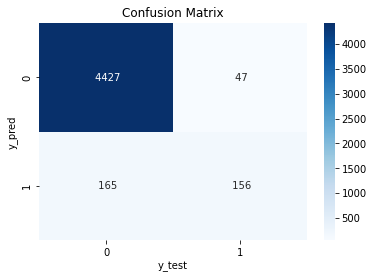

In [177]:
cm=confusion_matrix(Y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [178]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4474
           1       0.77      0.49      0.60       321

    accuracy                           0.96      4795
   macro avg       0.87      0.74      0.79      4795
weighted avg       0.95      0.96      0.95      4795

